In [1]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import nibabel as nib
from PIL import Image

os.chdir('./dataset/')
plt.style.use('dark_background')

2023-05-18 15:15:06.881439: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-18 15:15:07.436131: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
def fast_display(*img2dlst):
    plt.figure(figsize=(16, 8))
    nbimg = len(img2dlst)
    cols = min(9, nbimg)
    rows = (nbimg // cols) + 1
    for ii, img2d in enumerate(img2dlst):
        plt.subplot(rows, cols, 1+ii)
        plt.imshow(img2d)
    plt.show()

In [4]:
def PrintSlices(img):
    sx, sy, sz, _ = img.shape
    fast_display(img[sx//2,:, :, 0], img[sy//2,:, :, 0], img[sz//2,:, :, 0], )

New patient :  subject-3-label.img
T1 : Coupes sagittale, coronale, axiale de subject-3-label.img


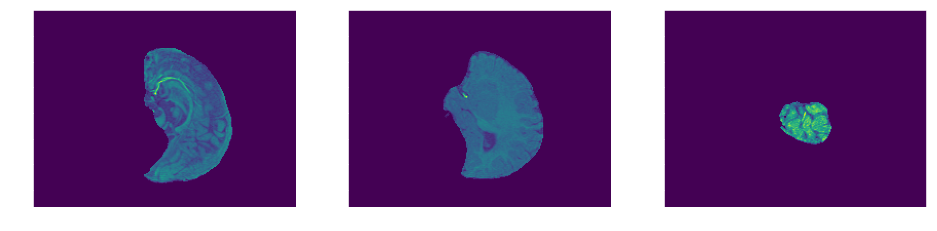

T2 : Coupes sagittale, coronale, axiale de subject-3-label.img


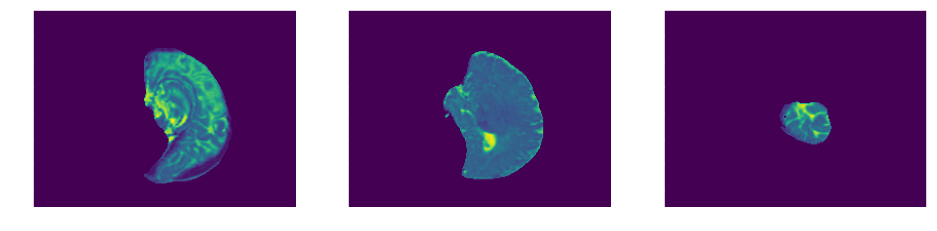

LABELS : Coupes sagittale, coronale, axiale de subject-3-label.img


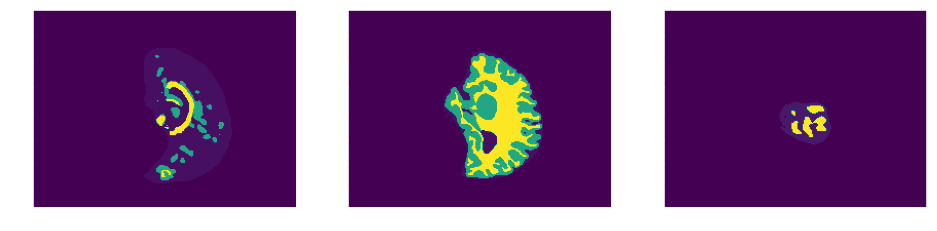

New patient :  subject-2-label.img
New patient :  subject-1-label.img
New patient :  subject-4-label.img
New patient :  subject-5-label.img
New patient :  subject-10-label.img
New patient :  subject-6-label.img
New patient :  subject-9-label.img
New patient :  subject-8-label.img
New patient :  subject-7-label.img


In [6]:

nb_patient = 0
for dirname, _, filenames in os.walk('./'):
    for filename in filenames:
        if "label" in filename and "hdr" not in filename:
            print("New patient : ", filename)
            
            nomT1 = filename[:-10] + "-T1.img"
            T1 = nib.load(nomT1).get_fdata()
            if nb_patient == 0:
                print("T1 : Coupes sagittale, coronale, axiale de", filename)
                PrintSlices(T1)
            
            nomT2 = filename[:-10] + "-T2.img"
            T2 = nib.load(nomT2).get_fdata()
            if nb_patient == 0:
                print("T2 : Coupes sagittale, coronale, axiale de", filename)
                PrintSlices(T2)
            
            labels = nib.load(filename).get_fdata()
            if nb_patient == 0:
                print("LABELS : Coupes sagittale, coronale, axiale de", filename)
                PrintSlices(labels)
            
            nb_patient += 1